<a href="https://colab.research.google.com/github/karvs1458-gif/Inteligencia-Artificial/blob/main/Recurrentes/Predecir_el_Siguiente_N%C3%BAmero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RNN**

Equipo:
*   Hernández Barillas Valeria
*   Vilchis Sánchez Karla Daniela



**¿Qué es una RNN y qué la hace especial?**

“Una RNN es un tipo de red neuronal diseñada para procesar datos que vienen en secuencia, como texto, voz, música o series temporales.
Lo que las hace diferentes a una red normal es que tienen memoria.
Esa memoria se llama estado oculto y es básicamente un vector donde la red guarda información de lo que ya ha visto.”

Podemos imaginarlas como una persona escuchando una historia.
Si digo: ‘Ayer fui al parque y vi un…’, no podrías adivinar la última palabra sin recordar lo anterior.
Una RNN hace lo mismo:
usa lo que ya escuchó (la memoria) para entender lo que viene.

**¿Por qué se llaman “recurrentes”?**

Se llaman recurrentes porque repiten exactamente el mismo bloque de operaciones una y otra vez, paso por paso, a medida que avanza la secuencia.
Cada paso recibe dos cosas:

la entrada actual,

y el estado oculto anterior.

Lo combina, genera una salida y actualiza el estado oculto.
Ese estado actualizado es lo que se pasa al siguiente paso.

**¿Qué es el ‘estado oculto’?**

La parte más importante de una RNN es algo llamado estado oculto.
Este estado funciona como una cajita de recuerdos:

Llega un dato nuevo → mira lo que hay en la cajita.

Lo combina con la entrada actual.

Y actualiza la cajita con una memoria nueva.

Así, paso a paso, la red va recordando.

**¿Qué aprende una RNN realmente?**

Lo que una RNN aprende son los pesos internos de esas operaciones:
las matrices que mezclan la entrada y la memoria.
Con el entrenamiento, la red ajusta esos pesos para saber qué recordar, qué ignorar y cómo usar esa información para predecir mejor.\

**¿Cómo aprende una RNN?**

El aprendizaje se hace mediante un proceso llamado retropropagación en el tiempo.
La red hace predicciones, compara con la respuesta correcta, calcula el error y ajusta sus pesos.
Este ajuste es lo que le permite mejorar con el tiempo y mejorar su memoria.


**¿Qué problema tienen las RNN simples?**

“Aunque son muy útiles, tienen una limitación importante:
olvidan información lejana.
Esto se debe a un fenómeno llamado desvanecimiento del gradiente, donde los valores que deberían corregirse se vuelven tan pequeños que la red ya no aprende bien el contexto lejano.

Por eso surgieron variantes como LSTM y GRU, que incluyen mecanismos llamados compuertas para decidir:

qué recordar,

qué borrar,

y qué información nueva guardar.

Gracias a eso pueden manejar dependencias largas.”

**¿Para qué se usan las RNN?**

“Las RNN son útiles en cualquier tarea donde lo anterior afecta lo siguiente.
Por ejemplo:

generación o predicción de texto,

reconocimiento de voz,

traducción automática,

análisis de sentimientos,

predicción de series temporales como clima, ventas o sensores.”

In [ ]:
# Importamos NumPy para manejar arreglos numéricos
import numpy as np

# Importamos Matplotlib para graficar los resultados
import matplotlib.pyplot as plt

# Importamos las herramientas necesarias de Keras para construir la RNN
from tensorflow.keras.models import Sequential     # Modelo secuencial
from tensorflow.keras.layers import SimpleRNN, Dense  # Capa RNN y capa densa fully-connected
from tensorflow.keras.callbacks import EarlyStopping  # Detener entrenamiento automáticamente
from tensorflow.keras.optimizers import Adam          # Optimizador

# Métrica R² (coeficiente de determinación) para medir precisión
from sklearn.metrics import r2_score

In [ ]:
# Generamos una secuencia del 1 al 30 como datos base
data = np.array(range(1, 31), dtype=float)

# Guardamos el valor máximo para revertir la normalización después
max_val = np.max(data)

# Normalizamos dividiendo entre el máximo (los valores quedan entre 0 y 1)
data = data / max_val

# Definimos tamaño de ventana deslizante
ventana = 3

# Creamos listas para guardar pares (X,Y)
X, y = [], []

# Recorremos los datos creando ventanas de entrenamiento
for i in range(len(data) - ventana):
    X.append(data[i:i+ventana])   # Ejemplo (input)
    y.append(data[i+ventana])    # Valor siguiente (target)

# Convertimos a arreglos NumPy
X, y = np.array(X), np.array(y)

# Dividimos 20 datos para entrenamiento y el resto para prueba
X_train, y_train = X[:20], y[:20]
X_test, y_test = X[20:], y[20:]

# Ajustamos dimensiones para la RNN (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], ventana, 1))
X_test = X_test.reshape((X_test.shape[0], ventana, 1))

In [ ]:
# Creamos un modelo secuencial
model = Sequential([
    # Capa SimpleRNN con 80 neuronas y activación tanh
    SimpleRNN(80, activation='tanh', input_shape=(ventana, 1)),
    # Capa densa intermedia con 40 neuronas ReLU
    Dense(40, activation='relu'),
    # Capa de salida con 1 neurona (predice un solo valor)
    Dense(1, activation='linear')
])

# Compilamos el modelo usando MSE como pérdida
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# EarlyStopping detiene el entrenamiento si no mejora el modelo
early_stop = EarlyStopping(
    monitor='val_loss',     # Observa la pérdida de validación
    patience=100,           # Espera 100 épocas sin mejora
    restore_best_weights=True  # Recupera los mejores pesos
)
# Entrenamos el modelo
history = model.fit(
    X_train, y_train,
    epochs=40,              # Entrena 40 épocas
    verbose=0,              # No mostrar texto de entrenamiento
    validation_data=(X_test, y_test),  # Datos de prueba
    callbacks=[early_stop]  # Usamos EarlyStopping
)

In [ ]:
# El modelo predice los valores del conjunto de prueba
pred_test = model.predict(X_test, verbose=0)

# Calculamos R² y lo convertimos a porcentaje
precision = r2_score(y_test, pred_test) * 100

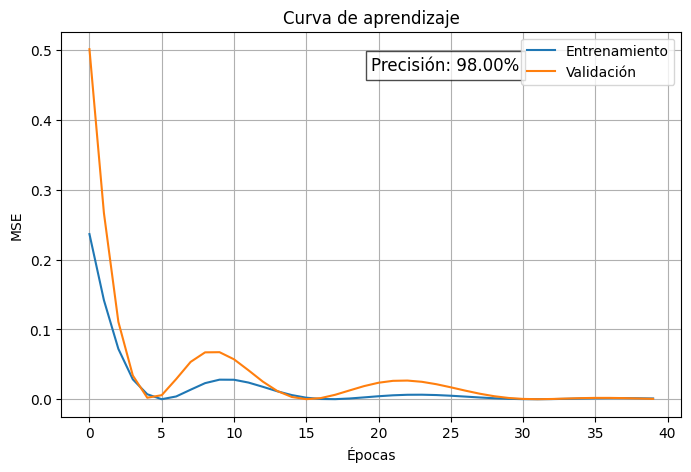

In [ ]:
plt.figure(figsize=(8,5))   # Tamaño de la gráfica

# Dibujamos la pérdida de entrenamiento
plt.plot(history.history['loss'], label='Entrenamiento')

# Dibujamos la pérdida de validación
plt.plot(history.history['val_loss'], label='Validación')

plt.title("Curva de aprendizaje")
plt.xlabel("Épocas")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)

# Mostramos el porcentaje de precisión sobre la gráfica
plt.text(
    0.50, 0.90,                       # Posición dentro del eje (%)
    f"Precisión: {precision:.2f}%",   # Texto visible
    transform=plt.gca().transAxes,    # Lo ubicamos dentro de los ejes
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black')  # Cuadro blanco
)

plt.show()

In [ ]:
# Primer ejemplo de predicción sobre valores normalizados
nueva_entrada = np.array([[18, 19, 20]]) / max_val
nueva_entrada = nueva_entrada.reshape((1, ventana, 1))
pred = model.predict(nueva_entrada, verbose=0)

# Desnormalizamos multiplicando por max_val
print(f"Predicción [18,19,20] → {pred[0][0]*max_val:.2f}")

# Segundo ejemplo
nueva_entrada = np.array([[19, 20, 21]]) / max_val
nueva_entrada = nueva_entrada.reshape((1, ventana, 1))
pred = model.predict(nueva_entrada, verbose=0)

print(f"Predicción [19,20,21] → {pred[0][0]*max_val:.2f}")

Predicción [18,19,20] → 21.60
Predicción [19,20,21] → 22.55
